**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [192]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import seaborn as sns

from IPython.display import display
import tqdm

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [193]:
df = pd.read_csv('../data/train.csv', keep_default_na=False)  # prevent implicit assignment of null values

In [194]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [195]:
df.shape

(1460, 81)

In [196]:
df.set_index('Id', inplace=True) # set Id column as the index
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

### B. Plot histograms of the numeric columns. 

In [198]:
def get_plot_dim(my_num):
    return int(np.sqrt(my_num) + 0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59a6446518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f59ac22e710>]], dtype=object)

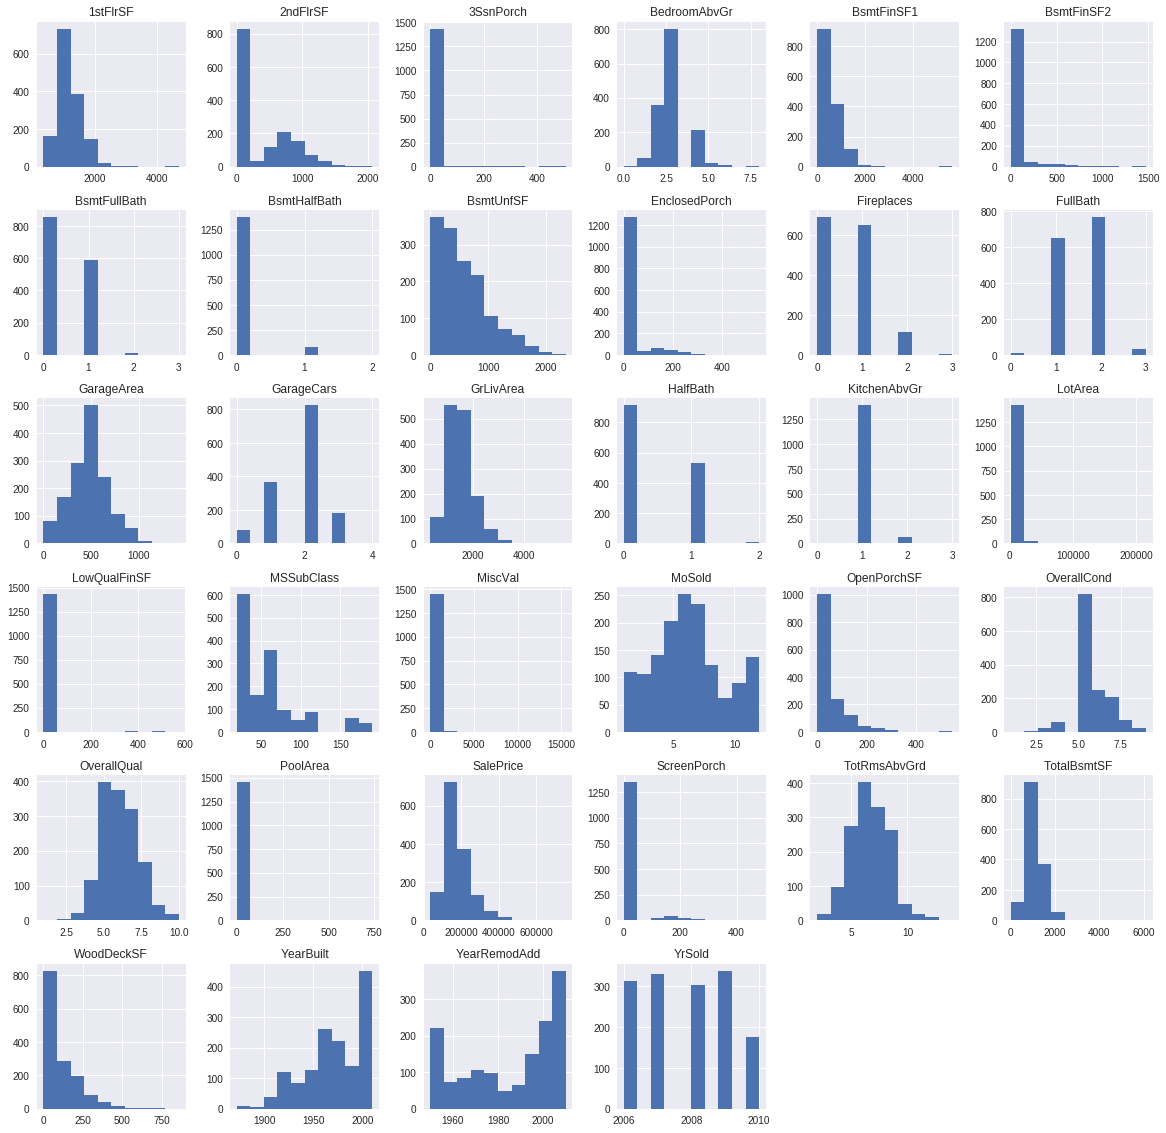

In [199]:
df_columns = list(df.select_dtypes(include=[np.number]).columns) 

col_count = get_plot_dim(len(df_columns))
row_count = col_count

df.hist(layout=(row_count,col_count), figsize=(20,20))

#### What are your observations? Add them to this markdown cell.
---
<font color='green'> ** Andy's response: Columns such as lot area, floor square footage, bedrooms above grade, kitchens above grade, basement bathrooms, and fireplaces are skewed right, which is reasonable, since fewer houses would have more or larger features. Year built and overall conditions, on the other hand, are skewed left, which would indicate that most homes are newer and would be in better condition as a result.  Finally, month sold is close to normally distributed, which would indicate seasonality in home sales.  **

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

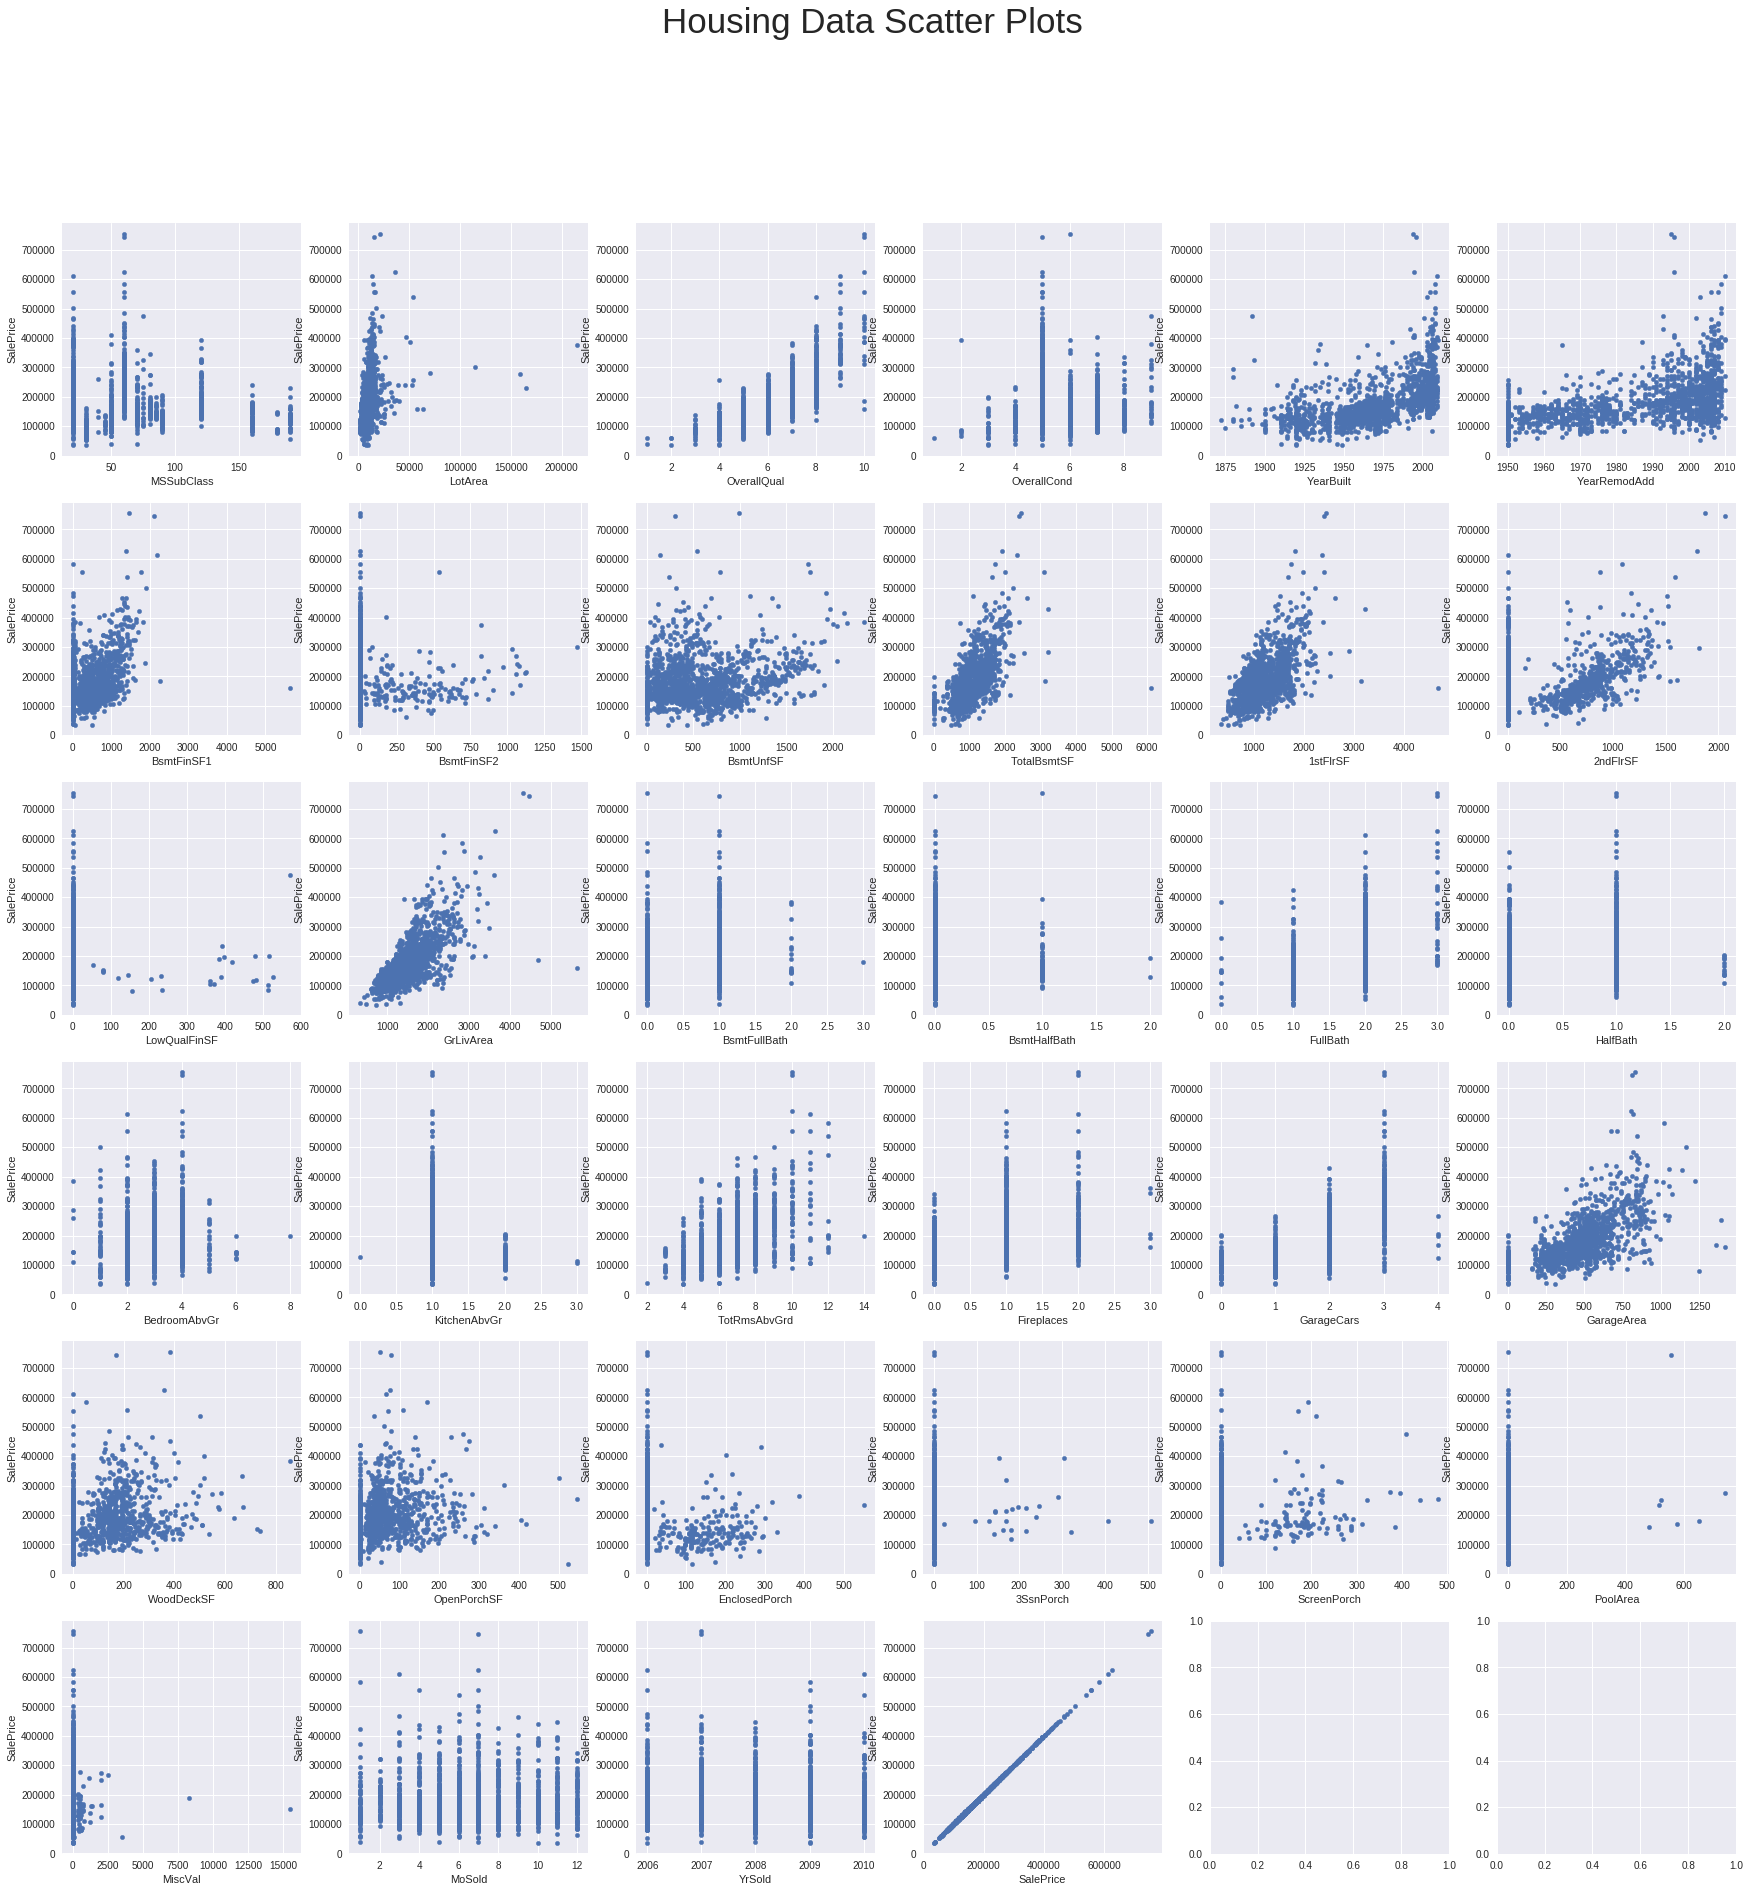

In [200]:
fig, ax = plt.subplots(nrows=row_count, ncols=col_count, figsize=(30, 30))
fig.suptitle("Housing Data Scatter Plots", fontsize=35)

for i, element in enumerate(df_columns):
    df.plot(kind='scatter', x=element, y='SalePrice', ax=ax[i // row_count, i % col_count])

#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: Most of the numeric columns with continuous variables are positively correlated with SalePrice.  For those columns with discrete variables, it is possible to spot a correlation, such as with overall quality, garage cars, and total rooms above grade.  However, other discrete columns, such as month sold anfd year sold do not have a clear correlation with sale price.  **


### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

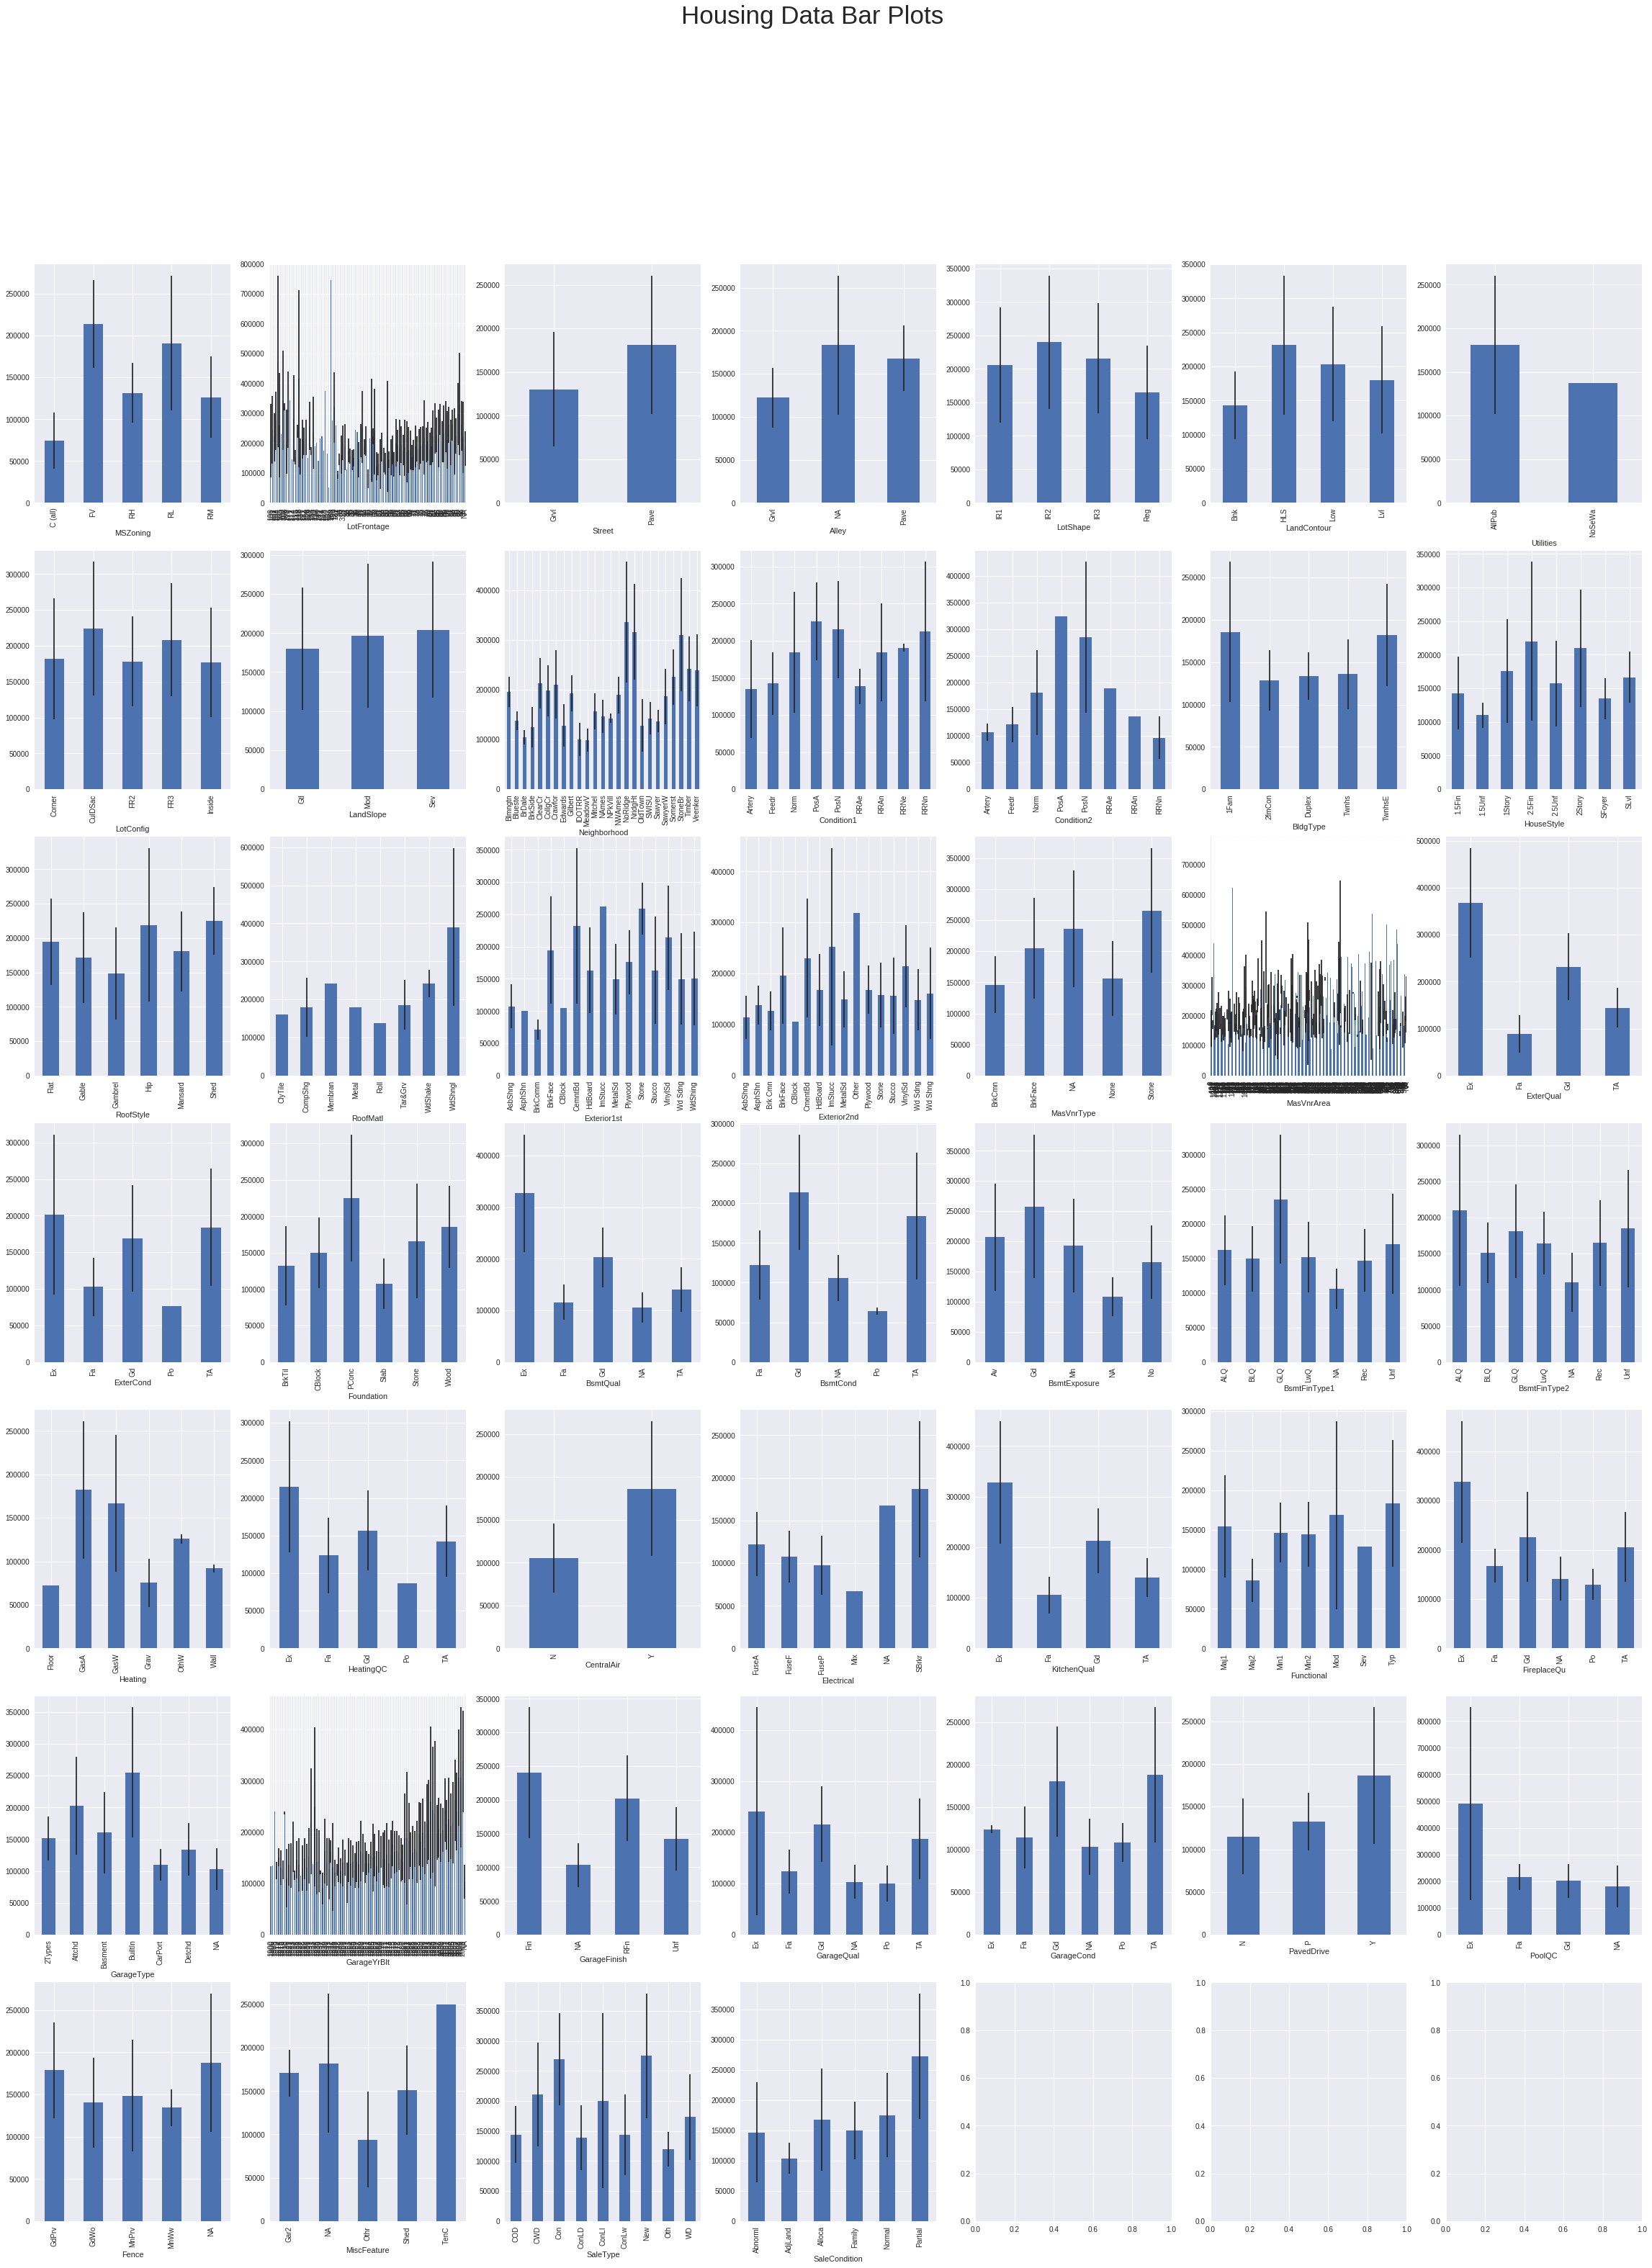

In [201]:
df_columns = list(df.select_dtypes(include=[np.object]).columns)

col_count = get_plot_dim(len(df_columns))
row_count = col_count

fig, ax = plt.subplots(nrows=row_count, ncols=col_count, figsize=(40, 50))
fig.suptitle("Housing Data Bar Plots", fontsize=35)

for i, element in enumerate(df_columns):
    df_mean = df.groupby([element])['SalePrice'].mean()
    df_errors = df.groupby([element]).std()

    my_ax = ax[i // row_count, i % col_count]

    my_ax.set_xlabel(element)    
    df_mean.plot(kind='bar', x=element, y='SalePrice', ax=my_ax, yerr=df_errors)

#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: Lot frontage, garage year built, and masonry veneer area appear to have many x-values, which would indicate that those fields are incorrectly classified as categorical features.  This will be addressed in the sections below.  In addition, most categorical columns have high variability, based on the size of the yerr lines. **


## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

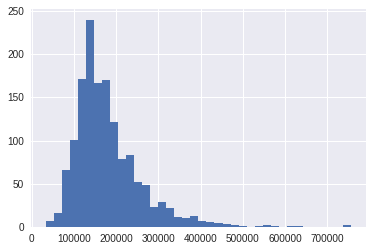

In [202]:
df['SalePrice'].hist(bins=int(np.sqrt(df.shape[0])))

In [203]:
my_iqr = df['SalePrice'].quantile(.75) - df['SalePrice'].quantile(.25)

lower_bound = df['SalePrice'].quantile(.25) - 1.5 * my_iqr
upper_bound = df['SalePrice'].quantile(.75) + 1.5 * my_iqr
print("1.5*IQR range:", lower_bound, "to", upper_bound)

1.5*IQR range: 3937.5 to 340037.5


* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?

<font color='green'> ** Andy's response: Tukey's method removes too many observations.  Therefore, it is more prudent to keep the middle 99.7% of data. **

In [204]:
lower_bound = df['SalePrice'].quantile(.0015)
upper_bound = df['SalePrice'].quantile(.9985)
print("Range of middle 99.7% data:", lower_bound, "to", upper_bound)

Range of middle 99.7% data: 38163.9 to 622484.8445000004


In [205]:
pd.isnull(df['SalePrice']).sum()

0

In [206]:
mask_lower_bound = df['SalePrice'] >= lower_bound
mask_upper_bound = df['SalePrice'] <= upper_bound

df_no_outliers = df[(mask_lower_bound & mask_upper_bound)]
df_no_outliers.shape

(1454, 80)

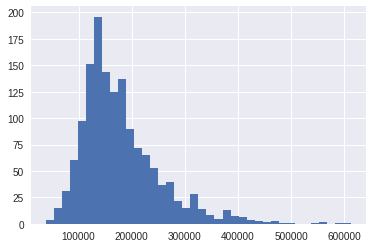

In [207]:
df_no_outliers['SalePrice'].hist(bins=int(np.sqrt(df.shape[0])))

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [208]:
def plot_null_values(df):
    dict_null_count = {}

    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            dict_null_count[col] = null_count

    x = np.arange(len(dict_null_count))
    y = dict_null_count.values()

    plt.bar(x, y)
    plt.xticks(x, dict_null_count.keys(), rotation='vertical')
    plt.show()

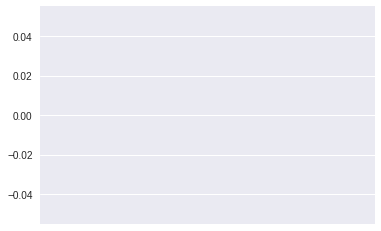

In [209]:
plot_null_values(df_no_outliers)

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
<font color='green'> **Andy's response: This is expected, since nulls were not implicitly set when reading in the data.**

In [210]:
# Begin data cleaning steps.  First, create dictionary of valid feature names values, based on data description text file
housing_data_desc = '../data_description.txt'
with open(housing_data_desc, 'r') as f:
    raw_ds = f.read()

ds_line = raw_ds.split('\n')
df_valid_feature_values = {}
feature = ''
feature_val = []

for line in ds_line:
    starts_with_alnum = len(line) > 0 and line[0].isalnum()
    line = line.lstrip(' ').rstrip(' ').strip('	')
    
    if starts_with_alnum and line.find(':') >= 0:
        line_split = line.split(':')
        feature = line_split[0]
        feature_val = []
    elif line == '':
        if len(feature_val) > 0:
            feature_val = list(set(feature_val))
            df_valid_feature_values[feature] = feature_val
        else:
            df_valid_feature_values[feature] = []
    else:
        line_split = line.split('	')
        feature_val.append(line_split[0].lstrip(' ').rstrip(' '))


In [211]:
# Next, determine unrecognized feature names in the data, per the dictionary, and update to valid feature names
for col in df_no_outliers.columns:
    if col == 'SalePrice':
        continue
    
    if col not in df_valid_feature_values:
        print(col, "is an invalid column name and is being renamed.")

df_no_outliers.rename(columns = {'BedroomAbvGr':'Bedroom', 'KitchenAbvGr':'Kitchen'}, inplace=True)

BedroomAbvGr is an invalid column name and is being renamed.
KitchenAbvGr is an invalid column name and is being renamed.


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [212]:
# Create a function to set invalid values in the object columns to null
def get_invalid_obj_values(df, df_valid_feature_values, col, clean=False):
    df_col_unique = list(df[col].unique())
    df_valid_unique = list(set((df_valid_feature_values[col])))
        
    my_list = [element for element in df[col] if element not in df_valid_feature_values[col]]
    my_list = list(set(my_list))
    
    if clean == True:
        if len(my_list) > 0:        
            for element in my_list:
                df[col].replace(to_replace=element, value=np.nan, inplace=True)
    
    return my_list

In [213]:
# Clean the data for each column.  
# Non-numerical values in numerical columns will be replaced with the mean for that column.
# Invalid object values will be investigated further.
invalid_obj_values = {}
for col in df_no_outliers.columns:
    if col == 'SalePrice':
        continue
       
    if len(df_valid_feature_values[col]) == 0:
        expected_type = int
    else:
        expected_type = object

    if expected_type == int:
        df_no_outliers[col] = pd.to_numeric(df_no_outliers[col], errors='coerce')
        df_no_outliers[col].replace(to_replace=np.nan, value=df_no_outliers[col].mean(), inplace=True)        
    elif expected_type == object:
        df_no_outliers[col] = df_no_outliers[col].astype(str)                
        df_valid_feature_values[col] = [str(x) for x in df_valid_feature_values[col]]
        
        my_list = get_invalid_obj_values(df_no_outliers, df_valid_feature_values, col, clean=False)
        if len(my_list) > 0:
            invalid_obj_values[col] = my_list
        
        df_no_outliers[col] = df_no_outliers[col].astype(object) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [214]:
# Dictionary of unique invalid values by column
invalid_obj_values

{'BldgType': ['Twnhs', 'Duplex', '2fmCon'],
 'Electrical': ['NA'],
 'Exterior2nd': ['Wd Shng', 'Brk Cmn', 'CmentBd'],
 'MSZoning': ['C (all)'],
 'MasVnrType': ['NA'],
 'Neighborhood': ['NAmes']}

In [215]:
# Some invalid values are very similar to valid values -- replace them manually
df_no_outliers['BldgType'].replace(to_replace='2fmCon', value='2FmCon', inplace=True)
df_no_outliers['BldgType'].replace(to_replace='Duplex', value='Duplx', inplace=True)
df_no_outliers['Exterior2nd'].replace(to_replace='CmentBd', value='CemntBd', inplace=True)
df_no_outliers['Exterior2nd'].replace(to_replace='Brk Cmn', value='BrkComm', inplace=True)
df_no_outliers['MSZoning'].replace(to_replace='C (all)', value='C', inplace=True)
df_no_outliers['MasVnrType'].replace(to_replace='NA', value='None', inplace=True)
df_no_outliers['Neighborhood'].replace(to_replace='NAmes', value='Names', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [216]:
# Replace remaining invalid values with nulls, which are to be replaced with valid values
invalid_obj_values2 = {}
for k in invalid_obj_values.keys():
    my_list = get_invalid_obj_values(df_no_outliers, df_valid_feature_values, k, clean=True)
    
    if len(my_list) > 0:
        invalid_obj_values2[k] = my_list

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [217]:
invalid_obj_values2

{'BldgType': ['Twnhs'], 'Electrical': ['NA'], 'Exterior2nd': ['Wd Shng']}

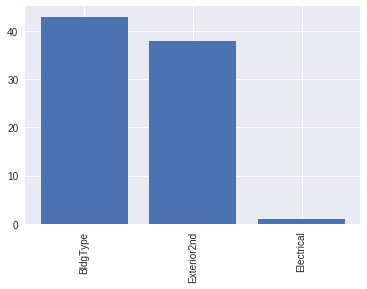

In [218]:
# Plot of null values by column
plot_null_values(df_no_outliers)

In [219]:
def replace_null_obj(df, col): 
# For categorical columns, replace remaining null values with most commonly occurring non-null value.
# Since the remaining nulls for each column above are in less than 2% of the observations, this is a resonable approach
    df_masked = df[df[col].notnull()]
    correct_value = df_masked[col].value_counts().index[0]
    df_no_outliers[col].replace(to_replace=np.nan, value=correct_value, inplace=True)

In [220]:
replace_null_obj(df_no_outliers, 'BldgType')
replace_null_obj(df_no_outliers, 'Exterior2nd')
replace_null_obj(df_no_outliers, 'Electrical')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Verify that you have *truly* eliminated all the null values!

In [221]:
df_check_nulls = pd.DataFrame(df_no_outliers.isnull().sum())
df_check_nulls[df_check_nulls[0] > 0]

,0


In [222]:
df_no_outliers.columns
df_no_outliers.shape

(1454, 80)

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [223]:
df_no_outliers_dummies = pd.get_dummies(df_no_outliers)
df_no_outliers_dummies.sample(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
499,65.000000,7800,1967,2004,89.0,450,0,414,864,899,...,0,0,0,1,0,0,0,0,1,0
1267,60.000000,10120,1910,1950,0.0,0,0,925,925,964,...,0,0,0,1,0,0,0,0,1,0
412,100.000000,34650,1955,1955,0.0,1056,0,0,1056,1056,...,0,0,0,1,0,0,0,0,1,0
1186,60.000000,9738,1924,1950,0.0,392,0,392,784,949,...,0,0,0,1,0,0,0,0,1,0
1038,69.948117,9240,2001,2002,396.0,0,0,1055,1055,1055,...,0,0,0,1,0,0,0,0,1,0


In [224]:
corr = df_no_outliers_dummies.corr()

my_df = corr[['SalePrice']]
my_df_abs = abs(my_df)
my_df_abs['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
GrLivArea               0.687463
GarageCars              0.647824
GarageArea              0.630573
TotalBsmtSF             0.607576
ExterQual_TA            0.600367
1stFlrSF                0.597944
FullBath                0.552451
BsmtQual_Ex             0.539769
YearBuilt               0.535367
TotRmsAbvGrd            0.530247
KitchenQual_TA          0.529689
YearRemodAdd            0.521680
Foundation_PConc        0.505707
KitchenQual_Ex          0.497537
GarageYrBlt             0.484639
FireplaceQu_NA          0.480295
ExterQual_Gd            0.465526
Fireplaces              0.465356
BsmtQual_TA             0.460224
MasVnrArea              0.455508
ExterQual_Ex            0.453313
OverallQual_8           0.452595
HeatingQC_Ex            0.440458
BsmtFinType1_GLQ        0.433853
OverallQual_9           0.432976
Neighborhood_NridgHt    0.426116
GarageFinish_Unf        0.421747
GarageFinish_Fin        0.415791
SaleType_New            0.379809
          

In [225]:
df_no_outliers_dummies.shape

(1454, 332)

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
# For X, use 10 features with highest correlations from analysis above 
y = df_no_outliers_dummies['SalePrice']
X = df_no_outliers_dummies[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'ExterQual_TA', '1stFlrSF', 'FullBath', \
                            'BsmtQual_Ex', 'YearBuilt', 'TotRmsAbvGrd']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.columns

Index(['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'ExterQual_TA',
       '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'YearBuilt', 'TotRmsAbvGrd'],
      dtype='object')

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [231]:
example_results = list()
result_1 = {'name':'raw ols','dataset' : 'X_train','preprocessing': 'raw','score': 'score'}
example_results.append(result_1)
result_2 = {'name':'scaled ols','dataset' : 'X_train_sc','preprocessing': 'scaled','score': 'score'}
example_results.append(result_2)
example_results

[{'dataset': 'X_train',
  'name': 'raw ols',
  'preprocessing': 'raw',
  'score': 'score'},
 {'dataset': 'X_train_sc',
  'name': 'scaled ols',
  'preprocessing': 'scaled',
  'score': 'score'}]

Then we pass the results list to pass to a DataFrame.

In [232]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,X_train,raw ols,raw,score
1,X_train_sc,scaled ols,scaled,score


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [233]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [234]:
def make_model(model, X_train, y_train, X_test, y_test, name, preproc, results, al=None):
    if al == None:    
        my_model = model()
    else:
        my_model = model(alphas=al)
        
    my_model.fit(X_train, y_train)
    train_score = my_model.score(X_train, y_train)
    test_score = my_model.score(X_test, y_test)
    
    results.append({'name':name,
                    'model':my_model,
                    'dataset' : 'train',
                    'preprocessing': preproc,
                    'score': train_score})
    results.append({'name':name,
                    'model':my_model,
                    'dataset' : 'test',
                    'preprocessing': preproc,
                    'score': test_score})

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [235]:
make_model(LinearRegression, X_train, y_train, X_test, y_test, 'benchmark', 'raw', results)

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [236]:
make_model(LinearRegression, X_train_sc, y_train, X_test_sc, y_test, 'benchmark', 'scaled', results)

Use a DataFrame to display your results.

In [237]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.744685
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.797658
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.744685
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.797658


#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: The benchmark and scaled models have the same train and test scores. **

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [238]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [239]:
make_model(Ridge, X_train, y_train, X_test, y_test, 'ridge', 'raw', results)

In [240]:
make_model(Ridge, X_train_sc, y_train, X_test_sc, y_test, 'ridge', 'scaled', results)

In [241]:
make_model(Lasso, X_train, y_train, X_test, y_test, 'lasso', 'raw', results)

In [242]:
make_model(Lasso, X_train_sc, y_train, X_test_sc, y_test, 'lasso', 'scaled', results)

In [243]:
make_model(ElasticNet, X_train, y_train, X_test, y_test, 'elastic net', 'raw', results)

In [244]:
make_model(ElasticNet, X_train_sc, y_train, X_test_sc, y_test, 'elastic net', 'scaled', results)

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [245]:
results_df = pd.DataFrame(results)

In [246]:
results_df

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.744685
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.797658
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.744685
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.797658
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.744675
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.798019
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.744685
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.797645
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.744685
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.797675


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [247]:
results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.797658
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.798019
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.797675
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.786271


#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: Ridge has the highest score among all raw models. **


#### Display just the scaled test results

In [248]:
results_df[(results_df.preprocessing == 'scaled') & 
               (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.797658
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.797645
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.797661
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.777974


#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: Benchmark has the highest score among all scaled models.  **


These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [249]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.744685
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.797658
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.744685
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,0.797658


#### Display just the Ridge models

In [250]:
results_df[(results_df.name == 'ridge')]

,dataset,model,name,preprocessing,score
4,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.744675
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,0.798019
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.744685
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,0.797645


#### Display just the Lasso models

In [251]:
results_df[(results_df.name == 'lasso')]

,dataset,model,name,preprocessing,score
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.744685
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,0.797675
10,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.744685
11,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,0.797661


#### Display just the Elasticnet models

In [252]:
results_df[(results_df.name == 'elastic net')]

,dataset,model,name,preprocessing,score
12,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.697612
13,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,0.786271
14,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.727138
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,0.777974


#### What are your observations? Add them to this markdown cell.

---
<font color='green'> ** Andy's response: The raw model on the test data had the highest score all ridge, lasso, and elastic net models. ** 


### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [253]:
cv_results = list()

In [254]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [255]:
alpha = np.logspace(-2,4,7)

In [256]:
make_model(RidgeCV, X_train, y_train, X_test, y_test, 'ridge cv', 'raw', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


In [257]:
make_model(LassoCV, X_train, y_train, X_test, y_test, 'lasso cv', 'raw', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


In [258]:
make_model(ElasticNetCV, X_train, y_train, X_test, y_test, 'elastic net cv', 'raw', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


#### Display just the raw test results

In [259]:
pd.DataFrame(cv_results)

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge cv,raw,0.744675
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge cv,raw,0.798019
2,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso cv,raw,0.744685
3,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso cv,raw,0.797658
4,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net cv,raw,0.744455
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net cv,raw,0.799250


#### Display just the scaled test results

In [260]:
make_model(RidgeCV, X_train_sc, y_train, X_test_sc, y_test, 'ridge cv', 'scaled', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


In [261]:
make_model(LassoCV, X_train_sc, y_train, X_test_sc, y_test, 'lasso cv', 'scaled', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


In [262]:
make_model(ElasticNetCV, X_train_sc, y_train, X_test_sc, y_test, 'elastic net cv', 'scaled', cv_results, alpha)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


In [263]:
cv_results_df = pd.DataFrame(cv_results)
cv_results_df[(cv_results_df.preprocessing == 'scaled')]

,dataset,model,name,preprocessing,score
6,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge cv,scaled,0.742148
7,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge cv,scaled,0.794454
8,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso cv,scaled,0.743556
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso cv,scaled,0.798721
10,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net cv,scaled,0.743728
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net cv,scaled,0.796250


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [264]:
pd.concat([results_df, cv_results_df]).sort_values('score', ascending=False).head(3)

,dataset,model,name,preprocessing,score
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net cv,raw,0.799250
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso cv,scaled,0.798721
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge cv,raw,0.798019


## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

<font color='green'> ** Andy's response: High bias can cause a model to miss relationships between features, thus underfitting the data.  On the other hand, high variance can introduce noise into the model, thus overfitting the model.  Therefore, when tuning hyperparameters, there is a tradeoff between bias and variance, in order to minimize these errors. **

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [265]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

In [266]:
cv_results_df.sort_values('score', ascending=False).iloc[0].model

ElasticNetCV(alphas=array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

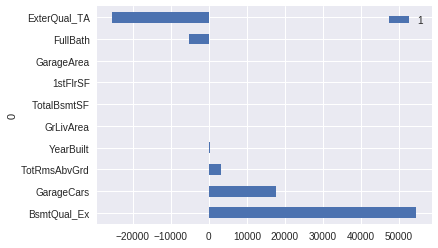

In [267]:
plot_coef(cv_results_df.sort_values('score', ascending=False).iloc[0].model, 5)

#### Which features add / take away most value from a home?

<font color='green'> ** Andy's response: basement quality and garage cars add the most value, whereas exterior quality and full bath take away the most value. **

# (Optional) Informing Business Value

Interpreting our work for a non-technical audience is a vital skill that every good Data Scientist must cultivate.  At the end of the day, our work must be informative to business process so connecting our detailed efforts to a high level strategy is critical.

We've established a few businesses cases that you should assert some explanation and advise best strategy through a model of your choice.  Also call out any exploratory analysis and reasoning for any recommendation.

##### For each question:
* Plot relevant data
* Fit a new model or use a previous  model
* Plot relevant coefficients


#### (Optional) Case 1: Which features add / take away most value from a home?

You just explained which coeffients add / take away most value, technically, but can you explain this in a non-technical manner?  Also, emphasize _why_ in your explanation.

- Choose a few examples and explain why the coefficients describe the target value of the property.

#### (Optional) Case 2: Can you identify any abnormally priced houses?
We might consider these being properties that are over or under predicted by price. Can you make sense of when and why these are over and under predicted?

#### (Optional) Case 3:  Which houses are good investments?

Which criteria would you look at?  How sure can you be of your assumptions?  Give precise metrics but also give a concise recommendation that is non-technical that communicates the risks of your anlaysis.

#### (Optional) Case 4:  Which houses are good investments (extended)?
One idea that is common in the real-estate invement community is called "flipping".  This usually entails buying a property with "changable" charactaristics that can be upgraded.  Examples of changable or "upgradable" features include:  A garage, a kitchen, etc.

Can you give us an idea of investments opportunities considering "upgradable" features?  You will have to explore this idea on your own and possibly do a little research for subject matter expertise.

- Some features of a house are worth more than others
- Some features can't be upgraded (ie: square footage)